In [44]:
#-*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt
import math
# 将列表中的数据切片读入矩阵
def Read(lines,m,n):
    A = np.zeros((m, n))
    A_row = 0  # 表示矩阵的行，从0行开始
    for line in lines:  # 把lines中的数据逐行读取出来
        list = line.strip('\n').split('\t')  # 处理逐行数据：strip表示把头尾的'\n'去掉，split表示以空格来分割行数据，然后把处理后的行数据返回到list列表中
        A[A_row:] = list[0:5]  # 把处理后的数据放到方阵A中。list[0:4]表示列表的0,1,2,3列数据放到矩阵A中的A_row行
        A_row += 1  # 然后方阵A的下一行接着读
    return A 
# 数据集初始化
def DataInit(): 
    '''1.读取训练集和测试集'''
    f1,f2 = open('train.txt'),open('test.txt') # 打开训练集和测试集
    lines1,lines2 = f1.readlines(),f2.readlines() # 把全部数据文件读到一个列表lines中
    Line1,Line2 = len(lines1),len(lines2) # 读取训练集合测试集的行数
    A,B = Read(lines1,Line1,5),Read(lines2,Line2,5)
    return A,B

In [45]:
'''一、数据集初始化'''
A,B = DataInit()
id = np.mat(A[:,0]).transpose() # 记录样本集的标号(75*1列向量)
A1,A2,A3 = A[0:25],A[25:50],A[50:75] # 提取三类训练集
B1,B2,B3 = B[0:25],B[25:50],B[50:75] # 提取三类测试集
data1 = np.concatenate((A1,B1),axis=0) # 各类训练集测试集拼接
data2 = np.concatenate((A2,B2),axis=0)
data3 = np.concatenate((A3,B3),axis=0)

data = np.concatenate((A,B),axis=0) # 训练集测试集拼接
data = np.delete(data,0,axis=1) # 删除第一列(类别号)

In [46]:
'''二、采用KL变换进行数据降维'''
'''1.计算两类均值向量'''
mean1 = np.mean(data1[:,1:],axis=0)
mean2 = np.mean(data2[:,1:],axis=0)
print(mean1)
print(mean2)

[5.006 3.428 1.462 0.246]
[5.936 2.77  4.26  1.326]


In [47]:
'''2.计算总类内离散度矩阵'''
s1 = data1[:,1:]-mean1
s1 = np.dot(s1.transpose(),s1)
s2 = data2[:,1:]-mean2
s2 = np.dot(s2.transpose(),s2)
s = s1+s2
print(s)

[[19.1434  9.0356  9.7634  3.2394]
 [ 9.0356 11.8658  4.6232  2.4746]
 [ 9.7634  4.6232 12.2978  3.8794]
 [ 3.2394  2.4746  3.8794  2.4604]]


In [48]:
'''3.计算总类内离散度矩阵的特征值、特征向量以及各成分贡献率'''
val,vec = np.linalg.eig(s) # 特征值与特征向量(原理：AX=λX )
val_rate = val/np.sum(val) # 贡献率
print(val)
print(vec)
print(val_rate)

[32.28012817  0.98812978  4.93174536  7.56739669]
[[ 0.72147523  0.08198431 -0.68685105 -0.03142771]
 [ 0.45260875 -0.13789345  0.49239195 -0.73053465]
 [ 0.49217023 -0.33311624  0.44661569  0.66883216]
 [ 0.17996467  0.92913806  0.29380303  0.13414528]]
[0.70530832 0.02159025 0.10775673 0.16534469]


Text(0.5, 1.0, '各特征成分所占比例')

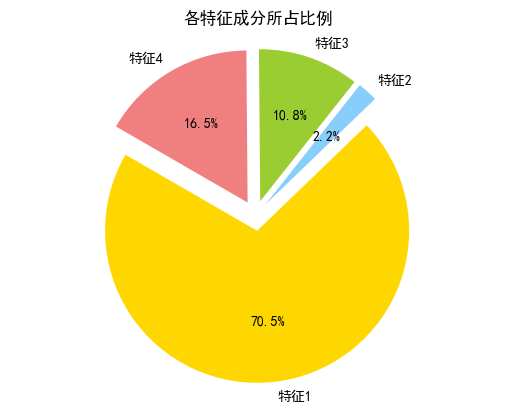

In [49]:
'''4.可视化各特征成分所占比例'''
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = ["特征1","特征2","特征3","特征4"]
y = val
colors = [ 'gold', 'lightskyblue','yellowgreen', 'lightcoral']
explode = [0.1,0.1,0.1,0.1]
# plt.pie(y,labels=x,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.pie(y,explode=explode,labels=x,colors=colors,autopct='%1.1f%%',shadow=False,startangle=150)
plt.axis('equal') # 显示为圆（避免比例压缩为椭圆）
plt.title('各特征成分所占比例')

In [51]:
'''5.降维打击:四维降到三维'''
index = np.argsort(-val) # 降序排序返回下角标
index = index[:3] # 取出前两大特征
data = np.concatenate((data1,data2),axis=0) # 训练集测试集拼接
new_data = np.dot(data[:,1:],vec[index].transpose())
new_data = np.concatenate((np.mat(data[:,0]).T,new_data),axis=1) # 插入标签
new_data1 = new_data[:50,:]
new_data2 = new_data[50:,:]
print(index)

[0 3 2]
